In [31]:
import pandas as pd 

In [32]:
wine = pd.read_csv("wine+quality/winequality-red.csv", delimiter=';')

In [33]:
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [34]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [35]:
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [36]:
wine.dropna(inplace=True)

In [37]:
print(wine.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [38]:
result = wine.groupby('quality').agg(['mean', 'std', 'count'])
print(result)


        fixed acidity                 volatile acidity                  \
                 mean       std count             mean       std count   
quality                                                                  
3            8.360000  1.770875    10         0.884500  0.331256    10   
4            7.779245  1.626624    53         0.693962  0.220110    53   
5            8.167254  1.563988   681         0.577041  0.164801   681   
6            8.347179  1.797849   638         0.497484  0.160962   638   
7            8.872362  1.992483   199         0.403920  0.145224   199   
8            8.566667  2.119656    18         0.423333  0.144914    18   

        citric acid                 residual sugar  ... density        pH  \
               mean       std count           mean  ...   count      mean   
quality                                             ...                     
3          0.171000  0.250664    10       2.635000  ...      10  3.398000   
4          0.174151  0.20

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

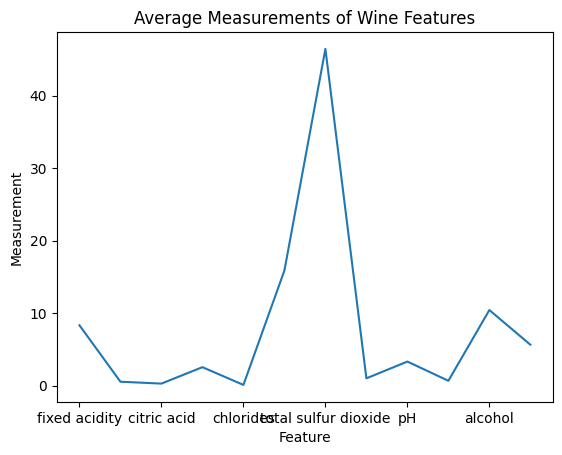

In [40]:
wine.mean().plot(kind='line')
plt.title('Average Measurements of Wine Features')
plt.xlabel('Feature')
plt.ylabel('Measurement')
plt.show()

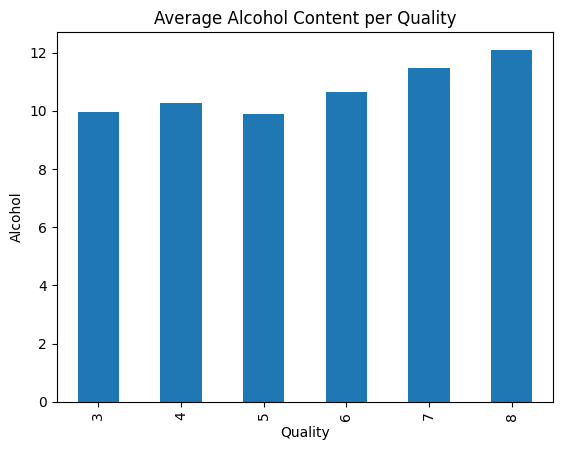

In [41]:
wine.groupby('quality')['alcohol'].mean().plot(kind='bar')
plt.title('Average Alcohol Content per Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

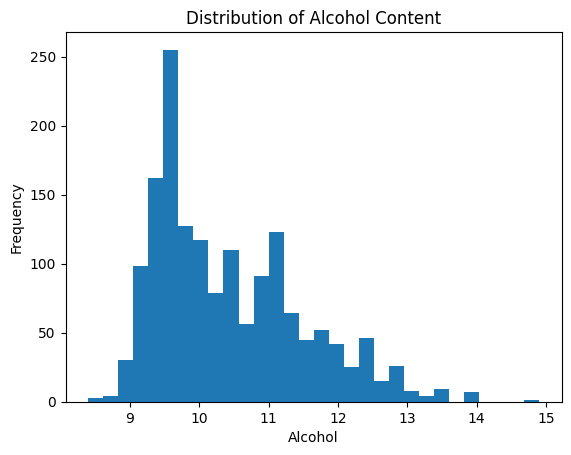

In [42]:
# Histogram of alcohol content
wine['alcohol'].plot(kind='hist', bins=30)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


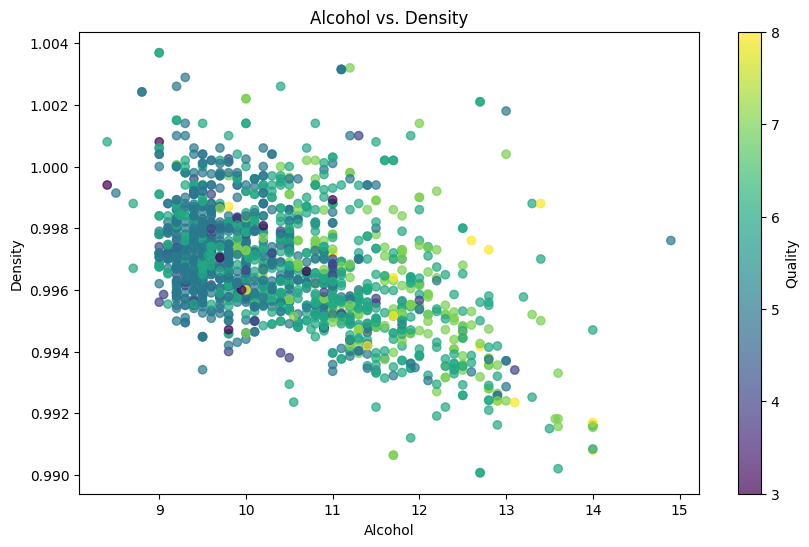

In [43]:
# Scatter plot of alcohol vs. density using matplotlib
plt.figure(figsize=(10, 6))

# Pass the 'quality' column directly to the 'c' parameter
scatter = plt.scatter(wine['alcohol'], wine['density'], c=wine['quality'], cmap='viridis', alpha=0.7)
plt.title('Alcohol vs. Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')
plt.show()


In [44]:
try:
    wine.head()
except FileNotFoundError:
    print("File not found. Please check the path and filename.")
except ValueError as e:
    print(f"Value error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
